<a href="https://colab.research.google.com/github/Houndjoisaacetonam/Openclassroomprojet/blob/main/iris_pmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open ('iris.names', 'r') as f:
  print(f.read())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [9]:
colums = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Species']

In [10]:
df = pd.read_csv('iris.data', names = colums)

In [11]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.drop('Species', axis = 1, inplace=True)

In [14]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [50]:
df.isnull().sum()

,0
Sepal_length,0
Sepal_width,0
Petal_length,0
Petal_width,0


#Standardisation

In [15]:
from  sklearn.preprocessing import StandardScaler

In [16]:
scale = StandardScaler()

In [17]:
X_scale = scale.fit_transform(df)

#CAH

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

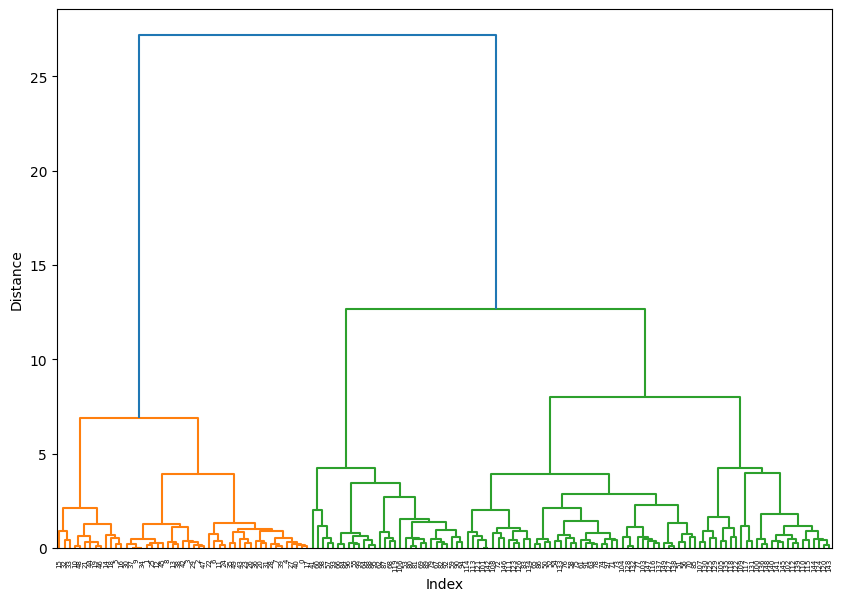

In [20]:
plt.figure(figsize=(10,7))
var = linkage(X_scale, method='ward')
dendrogram(var)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [24]:
from sklearn.metrics import silhouette_score

In [26]:
cah = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [27]:
y_cah = cah.fit_predict(X_scale)

In [28]:
silhouette_cah = silhouette_score(X_scale, y_cah)

In [29]:
silhouette_cah

0.44553956399200406

#Réduction de dimension avec PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)

In [23]:
x_pca = pca.fit_transform(X_scale)

In [90]:
Components = range(1,5)

In [91]:
for i in Components:
  pca = PCA(n_components=i)
  pca.fit_transform(X_scale)

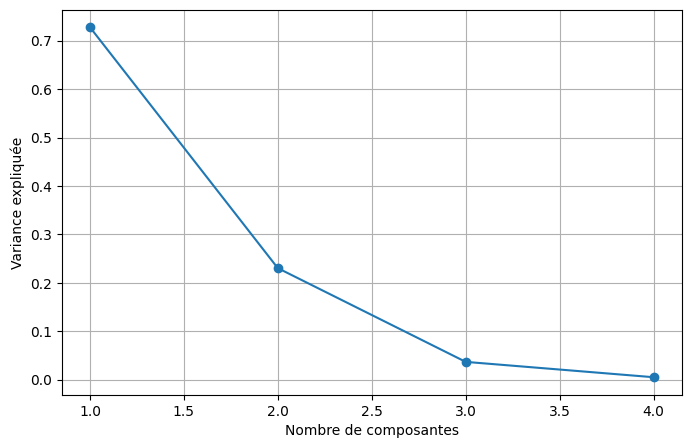

In [92]:
plt.figure(figsize=(8,5))
plt.plot(Components, pca.explained_variance_ratio_, marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée')
plt.grid()
plt.show()

#Visualisation de CAH

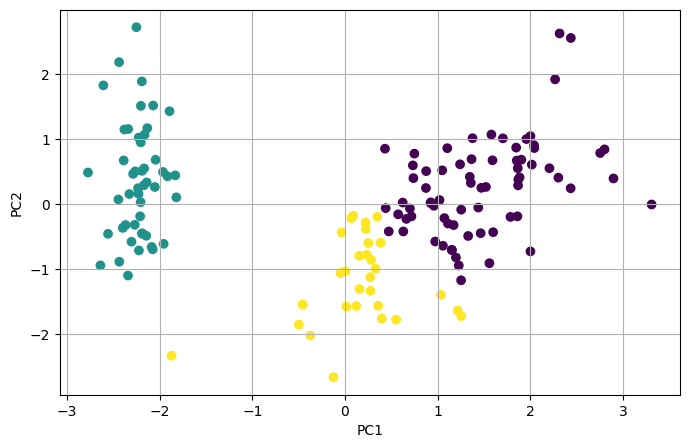

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_cah)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


#KMeans

In [32]:
from sklearn.cluster import KMeans

In [60]:
inertie = []

k_value = range(1,11)

for k in k_value:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_scale)
  inertie.append(kmeans.inertia_)

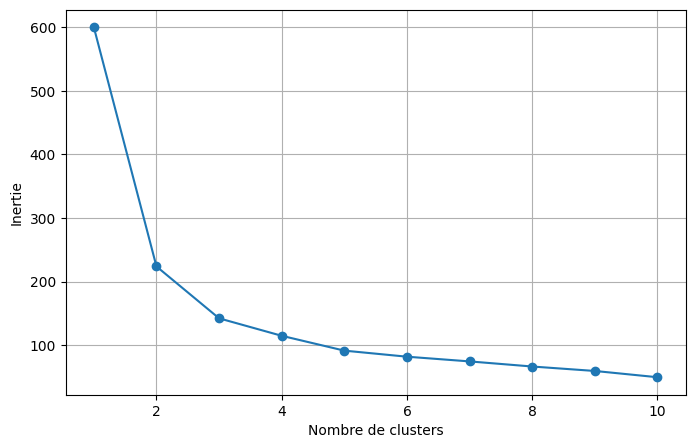

In [61]:
plt.figure(figsize=(8,5))
plt.plot(k_value, inertie, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.grid()
plt.show()

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [55]:
kmeans.fit(X_scale)

KMeans(n_clusters=3, random_state=42)

In [56]:
y_kmeans = kmeans.predict(X_scale)

In [57]:
silhouette_kmeans = silhouette_score(X_scale, y_kmeans)

In [58]:
silhouette_kmeans

0.4787241921049546

#Visualisation de Kmeans

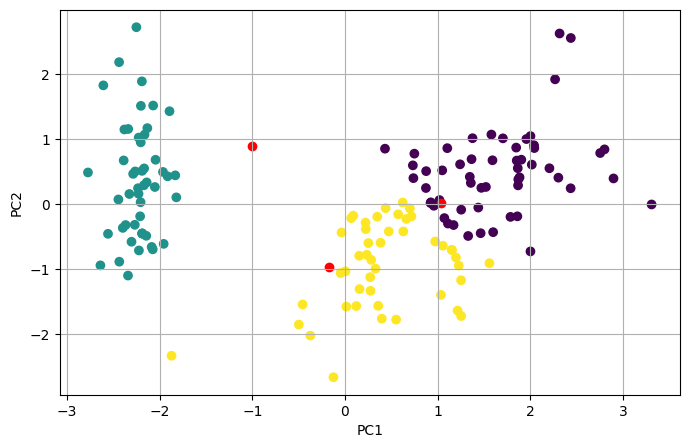

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

#DBSCAN

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [66]:
y_dbscan = dbscan.fit_predict(X_scale)

In [67]:
silhouette_dbscan = silhouette_score(X_scale, y_dbscan)

In [68]:
silhouette_dbscan

0.3491981656526392

In [71]:
best_score = -1
best_eps = None
best_min_samples = None

In [77]:
for eps in np.arange(0.1, 2, 0.1):
  for min_samples in range(1, 21):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_dbscan = dbscan.fit_predict(X_scale)
    if len(set(y_dbscan)) > 1:
      score = silhouette_score(X_scale, y_dbscan)
      if score > best_score:
        best_score = score
        best_eps = eps
        best_min_samples = min_samples

In [78]:
best_score, best_eps, best_min_samples

(0.580184463257396, 1.5000000000000002, 1)

#Visualisation de DBSCAN

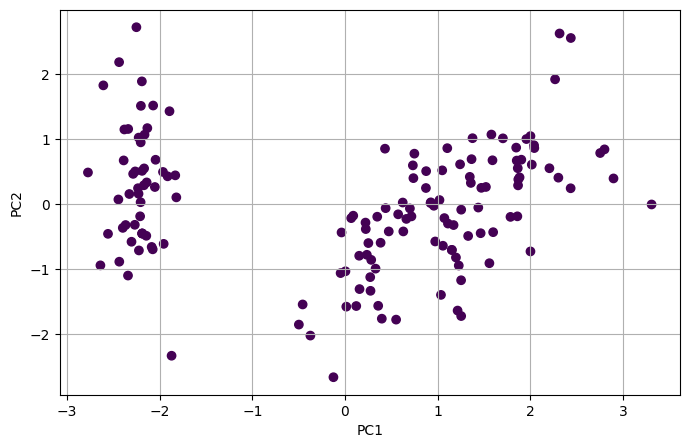

In [81]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_dbscan)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

#IsolationForest

In [82]:
from sklearn.ensemble import IsolationForest

In [142]:
iso_score = 0
contamination = None

In [143]:
for contamination in [0.01, 0.05, 0.1, 0.2, 0.3]:
    iso = IsolationForest(contamination=contamination)
    y_iso = iso.fit_predict(X_scale)
    score = silhouette_score(X_scale, y_iso)
    if score > iso_score:
        iso_score = score

In [146]:
iso_score, contamination

(0.2934413387881864, 0.3)

In [158]:
iso = IsolationForest(contamination=contamination)

In [159]:
y_iso = iso.fit_predict(X_scale)

In [160]:
anomalies = (y_iso == -1).sum()

In [161]:
normals = (y_iso == 1).sum()

In [162]:
anomalies

45

In [163]:
normals

105

In [164]:
df['Anormaly'] = y_iso

In [166]:
df[df['Anormaly'] == -1]

,Sepal_length,Sepal_width,Petal_length,Petal_width,Anormaly
5,5.4,3.9,1.7,0.4,-1
8,4.4,2.9,1.4,0.2,-1
13,4.3,3.0,1.1,0.1,-1
14,5.8,4.0,1.2,0.2,-1
15,5.7,4.4,1.5,0.4,-1
16,5.4,3.9,1.3,0.4,-1
18,5.7,3.8,1.7,0.3,-1
22,4.6,3.6,1.0,0.2,-1
23,5.1,3.3,1.7,0.5,-1
24,4.8,3.4,1.9,0.2,-1


In [167]:
df[df['Anormaly'] == 1]

,Sepal_length,Sepal_width,Petal_length,Petal_width,Anormaly
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,1
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1


# Visualisation de Iso

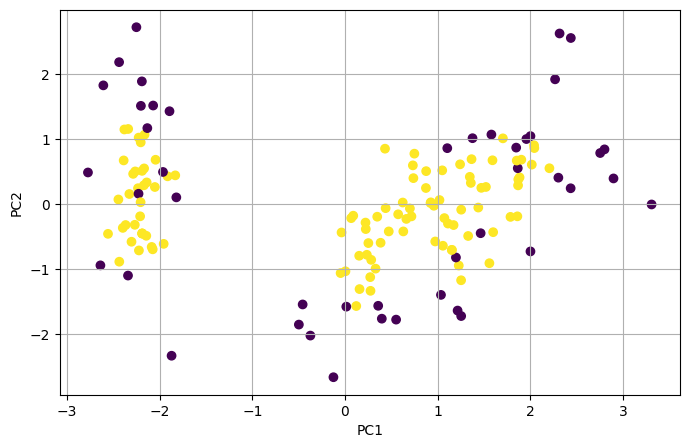

In [168]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_iso)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

#Visualisation des anormalies


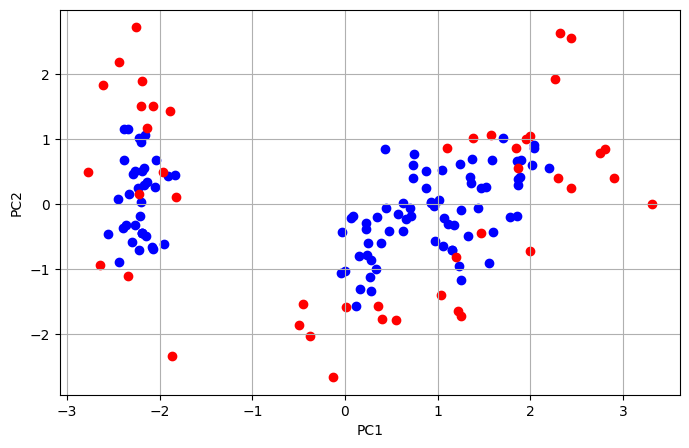

In [169]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[y_iso ==1, 0], x_pca[y_iso ==1, 1], c='blue', label='Normal')
plt.scatter(x_pca[y_iso ==-1, 0], x_pca[y_iso ==-1, 1], c='red', label='Anormal')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [170]:
best_score = max(iso_score, silhouette_cah, silhouette_kmeans, silhouette_dbscan)

In [171]:
best_score

0.4787241921049546

# Le meilleur score est celui de KMeans avec ***0.4787241921049546***